![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

In [3]:
import pydot
from collections import defaultdict 
import collections
from IPython.display import Image, display

In [4]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])
def lstr2(p):
        return '\n'.join([str(elem)  for elem in p])

**1.** Modify the PancakesTrees.ipynb code in your own to plot the Pancake Network and calculate Pn for smal n's.

In [5]:
from itertools import *

def ModifiedBFS(n): 

        # Create dictionaries graph,visited and pydot graph G
        
        
        # Create a queue for BFS 
        queue = [] 

        # Mark the source node as visited and enqueue it 
        listPerm = list(permutations(n))
        graphList = list([])
        distances = list([])
        for i in range (len(listPerm)):
          graph = defaultdict()
          visited = defaultdict()
          G = pydot.Dot(graph_type="graph", simplify = True)

          s = list(listPerm[i])
          permut = lstr(s)
          
          queue.append(s) 
          visited[lstr(s)] = True
          while queue: 
              # Dequeue a vertex from queue 
              s = queue.pop(0) 
              graph[lstr(s)] = []
              
              # Get all adjacent vertices of the 
              # dequeued vertex s. If a adjacent 
              # has not been visited, then mark it 
              # visited and enqueue it 
              if(s != sorted(s)):
                for i in range(len(s)-1):
                  d = s[i+1::-1] + s[i+2:]
                  if (d != s) and not(lstr(d) in visited.keys()):
                    if(d != sorted(d)):
                      node = pydot.Node(lstr2(d))
                    else:
                      node = pydot.Node(lstr2(d),style="filled", fillcolor="green") # first sorted green
                    
                    G.add_node(node)
                    graph[lstr(s)].append(lstr(d))
                    queue.append(d)
                    visited[lstr(d)] = True

          dist = 0
          
          n = lstr(sorted(permut))
          while (n != permut):
            for elem in graph.items():
              if n in elem[1]: 
                n = elem[0]
                dist += 1
                break
          distances.append(dist)
          graphList.append(graph)


        fullGraph = defaultdict()
        for x in listPerm:
          fullGraph[lstr(list(x))]=[]
       
        for i in range (len(graphList)):
          fullGraph = merge(fullGraph, graphList[i])

        for element in fullGraph.items():
          node = pydot.Node(lstr2(element[0]))
          G.add_node(node)
          for node in element[1]:
            edge = pydot.Edge(lstr2(element[0]),lstr2(node))
            G.add_edge(edge)
        
        #Display the pydot graph G
        if (len(distances)!= 0):
          print("Pn =", max(distances))
        else: 
          print("Pn = 0")
        im = Image(G.create_png())
        display(im)

def merge (d1, d2):
  for item in d2.items():
    for elem in item[1]:
      if elem not in (d1[lstr(item[0])]):
        d1[lstr((item[0]))].append(lstr(elem))    
      
  return d1

Pn = 0


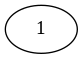

In [6]:
p = [1]
ModifiedBFS(p)

Pn = 1


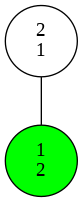

In [7]:
p = [1,2]
ModifiedBFS(p)

Pn = 3


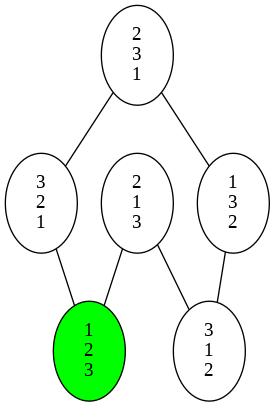

In [8]:
p = [2,1,3]
ModifiedBFS(p)

Pn = 4


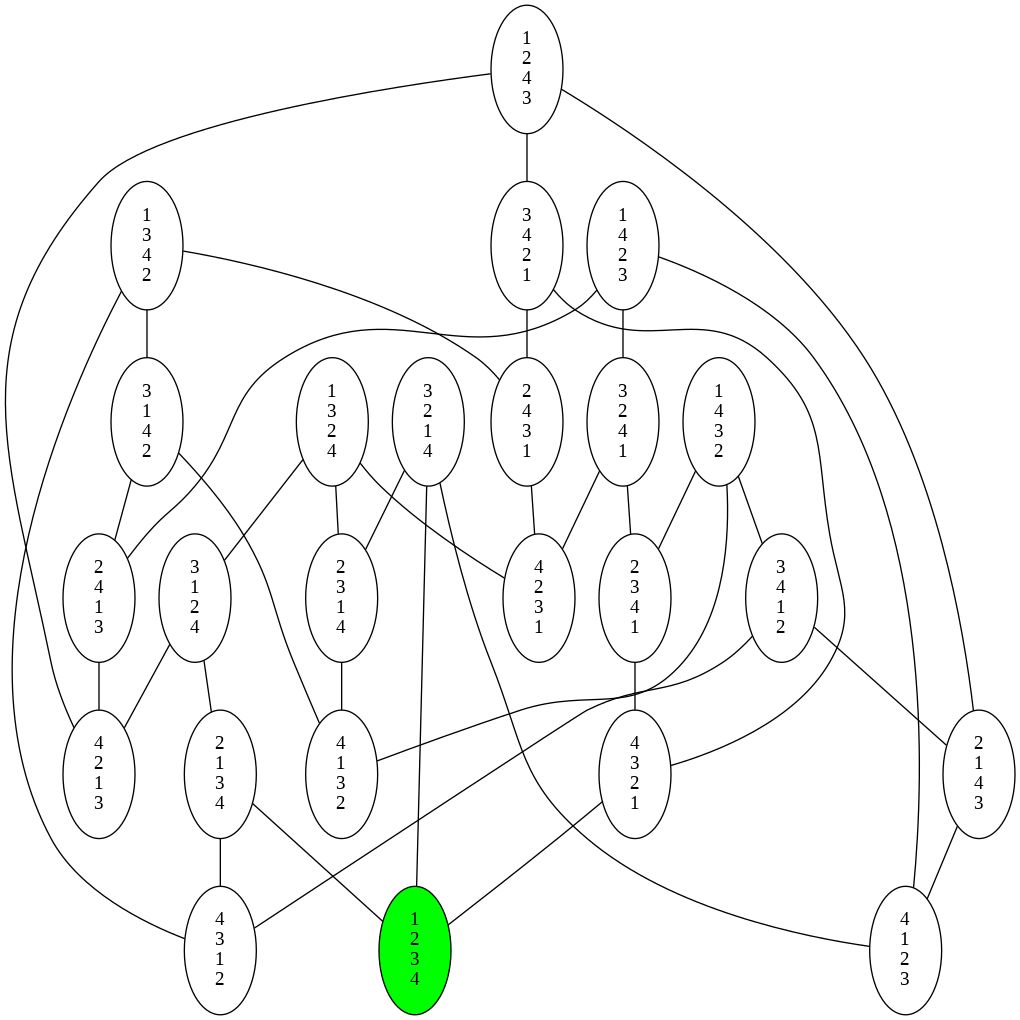

In [9]:
p = [1,3,2,4]
ModifiedBFS(p)

Pn = 5


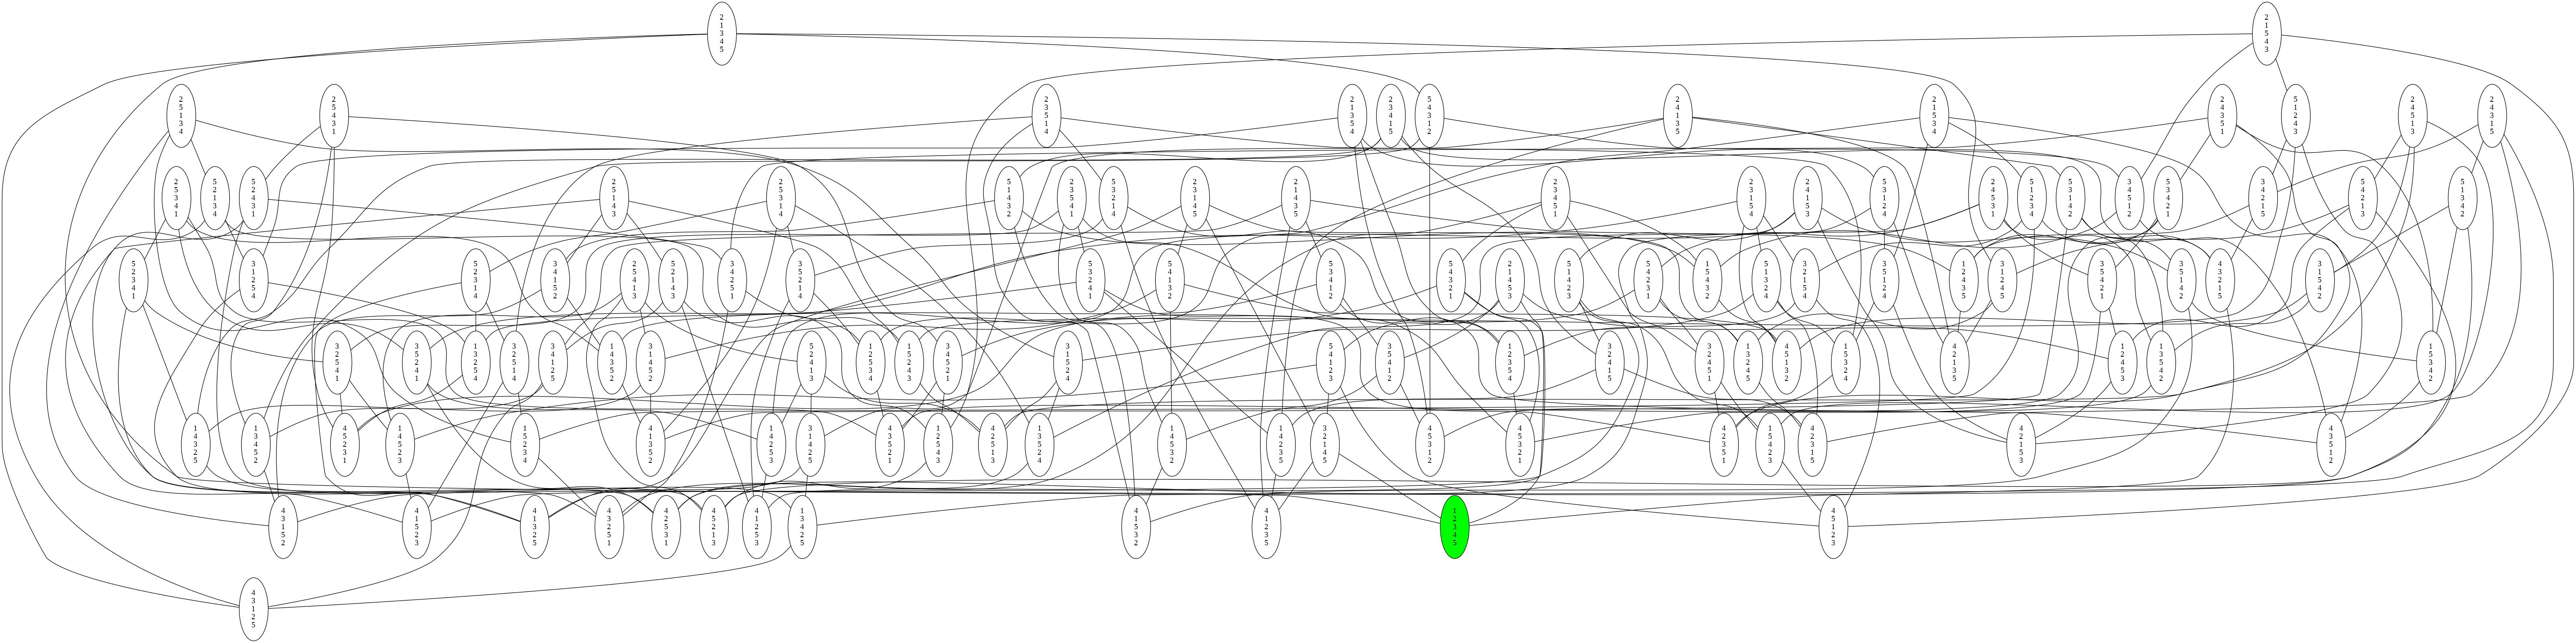

In [10]:
p = [2,5,3,1,4]
ModifiedBFS(p)

**2.** Modify the PancakesTrees.ipynb code leaving only the necessary code and data structures required to calculate the Pn and run the code for at least one night (8 hours) starting with n=5. What is the largest Pn calculated? (Save the results in drive to avoid losing them)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from itertools import *

def ModifiedBFS(n): 

        # Create a queue for BFS 
        queue = [] 

        # Mark the source node as visited and enqueue it 
        listPerm = list(permutations(n))
        graphList = list([])
        max_dist = -1
        for i in range (len(listPerm)):
          graph = defaultdict()
          visited = defaultdict()

          s = list(listPerm[i])
          permut = lstr(s)
          
          queue.append(s) 
          visited[lstr(s)] = True
          while queue: 
              # Dequeue a vertex from queue 
              s = queue.pop(0) 
              graph[lstr(s)] = []
              
              # Get all adjacent vertices of the 
              # dequeued vertex s. If a adjacent 
              # has not been visited, then mark it 
              # visited and enqueue it 
              if(s != sorted(s)):
                for i in range(len(s)-1):
                  d = s[i+1::-1] + s[i+2:]
                  if (d != s) and not(lstr(d) in visited.keys()):
                    graph[lstr(s)].append(lstr(d))
                    queue.append(d)
                    visited[lstr(d)] = True

          dist = 0
          
          n = lstr(sorted(permut))
          while (n != permut):
            for elem in graph.items():
              if n in elem[1]: 
                n = elem[0]
                dist += 1
                break
          with open("/content/drive/MyDrive/2020-2S/ALGORITMOS/my_data.txt", 'a') as f:
            f.write("permutación "+lstr(permut)+", P_n = "+str(dist)+"\n")
          if (dist>max_dist):
            max_dist = dist

        print("P_",len(n), "=", max_dist)
        with open("/content/drive/MyDrive/2020-2S/ALGORITMOS/my_data.txt", 'a') as f:
          f.write("P_"+str(n_pancakes)+" = "+str(max_dist)+"\n_________________________________\n")
        return max_dist

def merge (d1, d2):
  for item in d2.items():
    for elem in item[1]:
      if elem not in (d1[lstr(item[0])]):
        d1[lstr((item[0]))].append(lstr(elem))    
      
  return d1

In [ ]:
n_pancakes = 5
while (True):
  p = [i for i in range (n_pancakes)]
  ModifiedBFS(p)
  n_pancakes+=1

P_ 5 = 5
P_ 6 = 7
P_ 7 = 8


**3.** Modify the PancakesTrees.ipynb code to plot the pancakes trees using two spatulas.

In [11]:
def ModifiedBFSPreSols(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]

            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)):
                for j in range(len(s)):
                  if (s[i]!=s[j]):
                    (s[i],s[j])=(s[j],s[i])
                    d = s[:]
                    (s[i],s[j])=(s[j],s[i])
                    
                    if (d != s) and not(lstr(d) in visited.keys()):
                      if(d != sorted(d)):
                        node = pydot.Node(lstr2(d))
                      else:
                        node = pydot.Node(lstr2(d),style="filled", fillcolor="green") # first sorted green
                      
                      G.add_node(node)
                      edge = pydot.Edge(lstr2(s),lstr2(d))
                      G.add_edge(edge)
                      graph[lstr(s)].append(lstr(d))
                      queue.append(d) 
                      visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

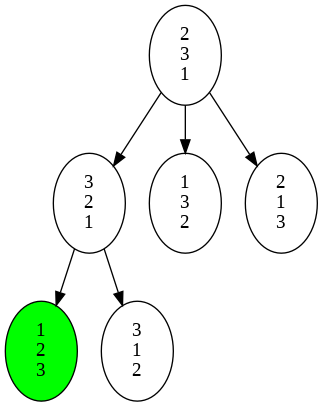

In [12]:
p = [2,3,1]
ModifiedBFSPreSols(p)

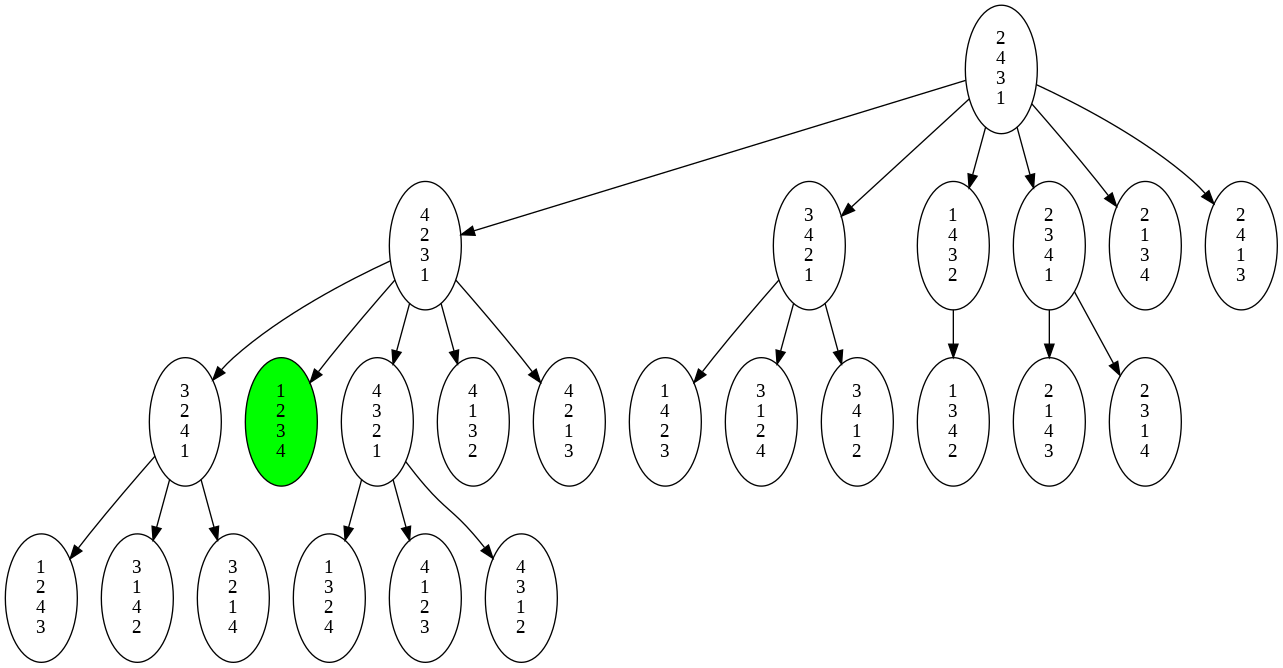

In [13]:
p = [2,4,3,1]
ModifiedBFSPreSols(p)

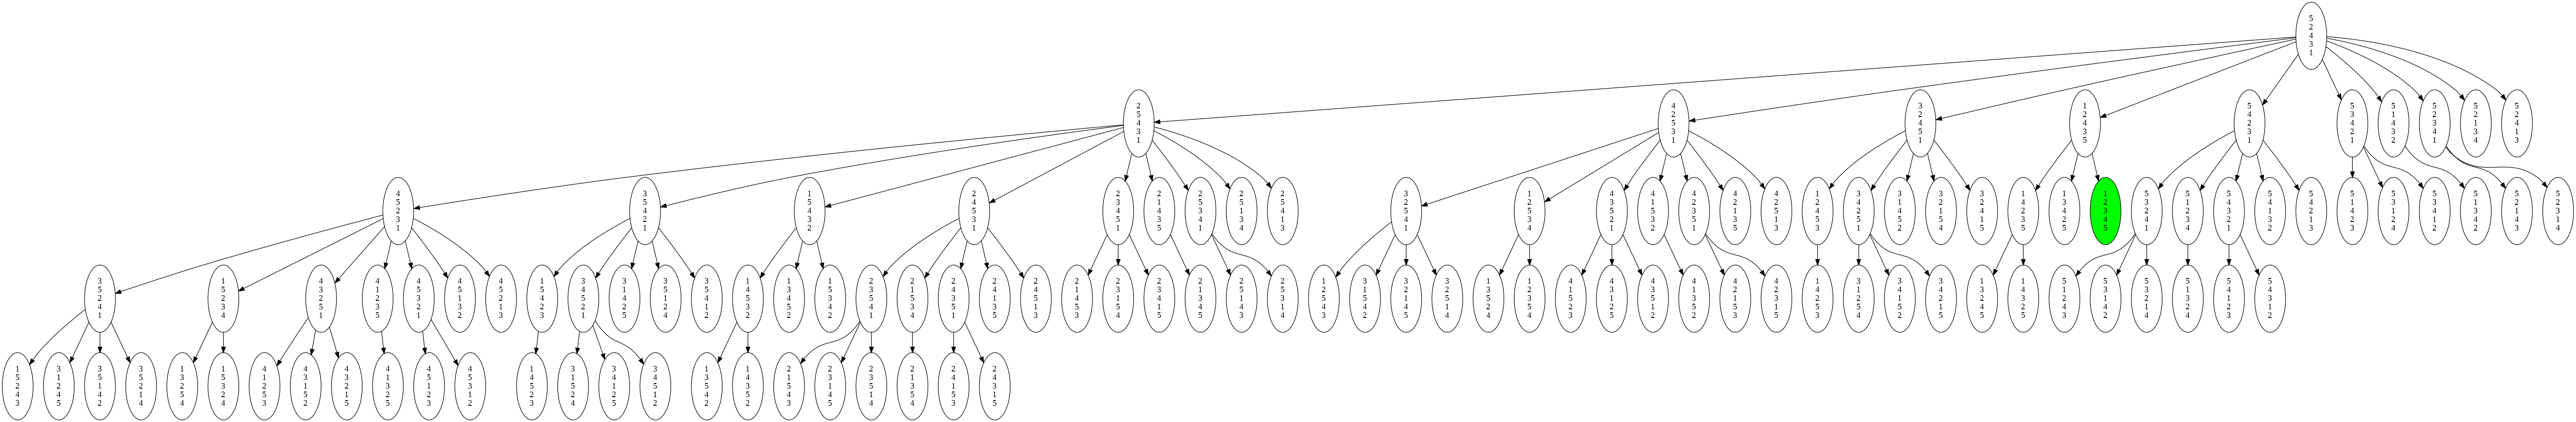

In [14]:
p = [5,2,4,3,1]
ModifiedBFSPreSols(p)

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/


